# Part 2: Visualization

In [2]:
pip install geopandas

In [3]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Map

Select the required data from the database

In [4]:
df = pd.read_excel("webscraping.xlsx", usecols=["Latitude", "Longitude", "Adults", "Children"])
df.head()

,Adults,Children,Latitude,Longitude
0,0.0,0.0,47.378864,-0.607726
1,5.0,1.0,50.333228,4.351559
2,13.0,8.0,50.712304,3.830113
3,7.0,5.0,50.645094,5.573611
4,4.0,2.0,50.454957,3.951958


Combine the scatter diagram with Geopandas

In [5]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf.head()

,Adults,Children,Latitude,Longitude,geometry
0,0.0,0.0,47.378864,-0.607726,POINT (-0.60773 47.37886)
1,5.0,1.0,50.333228,4.351559,POINT (4.35156 50.33323)
2,13.0,8.0,50.712304,3.830113,POINT (3.83011 50.71230)
3,7.0,5.0,50.645094,5.573611,POINT (5.57361 50.64509)
4,4.0,2.0,50.454957,3.951958,POINT (3.95196 50.45496)


Combine info with map

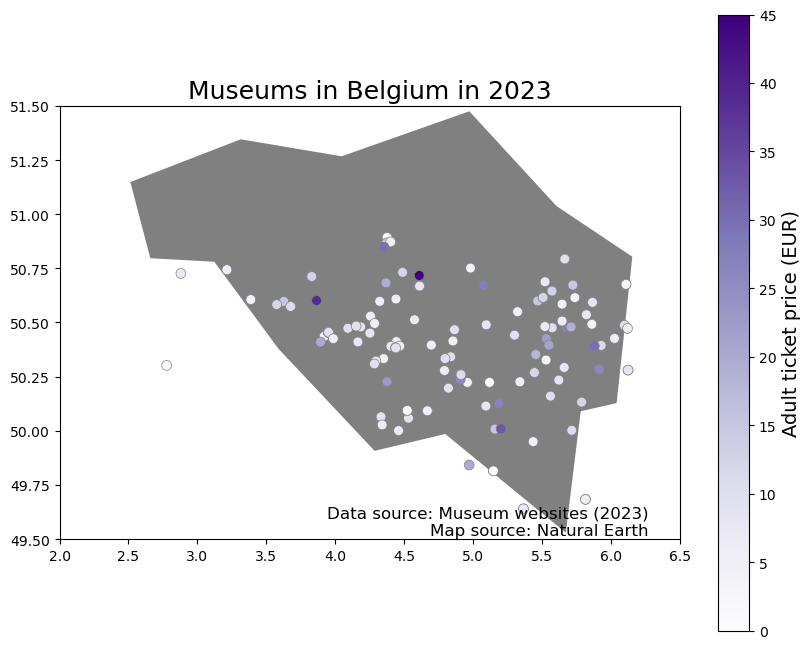

In [6]:
# Load the data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
belgium = world[world["name"] == "Belgium"]

# Set the figure size and axis limits
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim([2, 6.5])
ax.set_ylim([49.5, 51.5])

# Plot the map and add a title
belgium.plot(color="grey", ax=ax)
ax.set_title("Museums in Belgium in 2023", fontsize=18)

# Plot the museum locations and add a colorbar
cmap = "Purples"
sc = ax.scatter(df["Longitude"], df["Latitude"], s=50, c=df["Adults"], cmap=cmap, edgecolors='grey', linewidths=0.5)
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel("Adult ticket price (EUR)", fontsize=14)

# Add attribution text
plt.text(0.95, 0.01, "Data source: Museum websites (2023)\nMap source: Natural Earth",
         transform=ax.transAxes, fontsize=12, ha='right')

# Show the plot
plt.show()

We can see here that most of the activities are between 0 and 20€ for the adults.

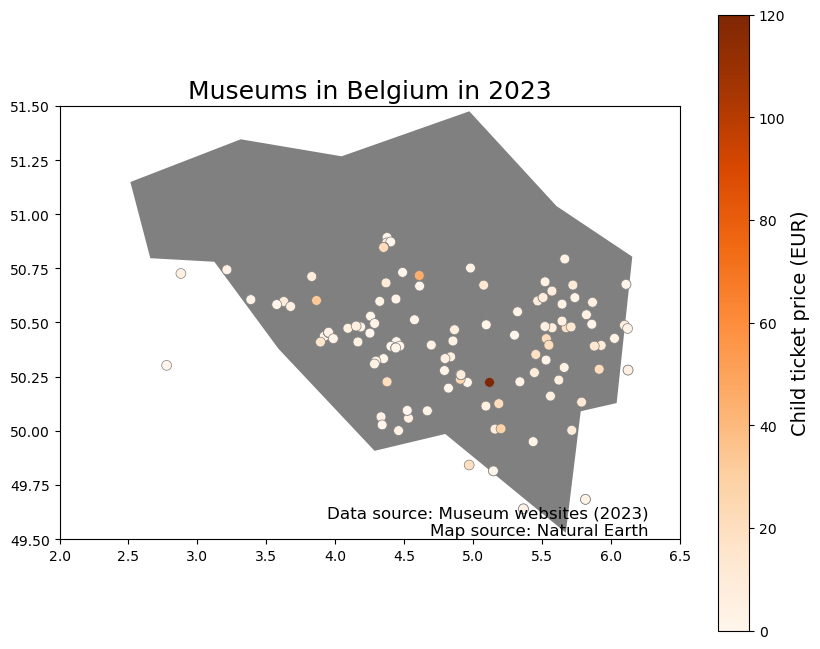

In [7]:
# Load the data
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
belgium = world[world["name"] == "Belgium"]

# Set the figure size and axis limits
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim([2, 6.5])
ax.set_ylim([49.5, 51.5])

# Plot the map and add a title
belgium.plot(color="grey", ax=ax)
ax.set_title("Museums in Belgium in 2023", fontsize=18)

# Plot the museum locations and add a colorbar
cmap = "Oranges"
sc = ax.scatter(df["Longitude"], df["Latitude"], s=50, c=df["Children"], cmap=cmap, edgecolors='grey', linewidths=0.5)
cbar = fig.colorbar(sc)
cbar.ax.set_ylabel("Child ticket price (EUR)", fontsize=14)

# Add attribution text
plt.text(0.95, 0.01, "Data source: Museum websites (2023)\nMap source: Natural Earth",
         transform=ax.transAxes, fontsize=12, ha='right')

# Show the plot
plt.show()

We can see that most of the activities are between 0 and 20€ for the children.

In [8]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [9]:
import folium
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)
belgium_map

In [10]:
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

belgium_df = df[(df['Latitude'] >= 49.5) & (df['Latitude'] <= 51.5) & (df['Longitude'] >= 2.5) & (df['Longitude'] <= 6.5)]

for lat, lon in zip(belgium_df['Latitude'], belgium_df['Longitude']):
    folium.Marker(location=[lat, lon]).add_to(belgium_map)

belgium_map

In [11]:
from folium.plugins import HeatMap
belgium_map = folium.Map(location=[50.5039, 4.4699], zoom_start=8)

belgium_df = df[(df['Latitude'] >= 49.5) & (df['Latitude'] <= 51.5) & (df['Longitude'] >= 2.5) & (df['Longitude'] <= 6.5)]

data = belgium_df[['Latitude', 'Longitude']].values.tolist()
heatmap_layer = HeatMap(data=data, min_opacity=0.3, max_val=100, radius=10, blur=5, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'})
heatmap_layer.add_to(belgium_map)

belgium_map

C:\Users\schmi\AppData\Local\Temp\ipykernel_15288\4008482117.py:7: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap_layer = HeatMap(data=data, min_opacity=0.3, max_val=100, radius=10, blur=5, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 1: 'red'})


You can see that the graphs where the activities are located in Belgium and where we have places with a high density of activities. For example, Brussel is where we have the most activities in Belgium. 

## Scatter plot

### Adults

**See if there is a relation between the type of activity and the adult price**

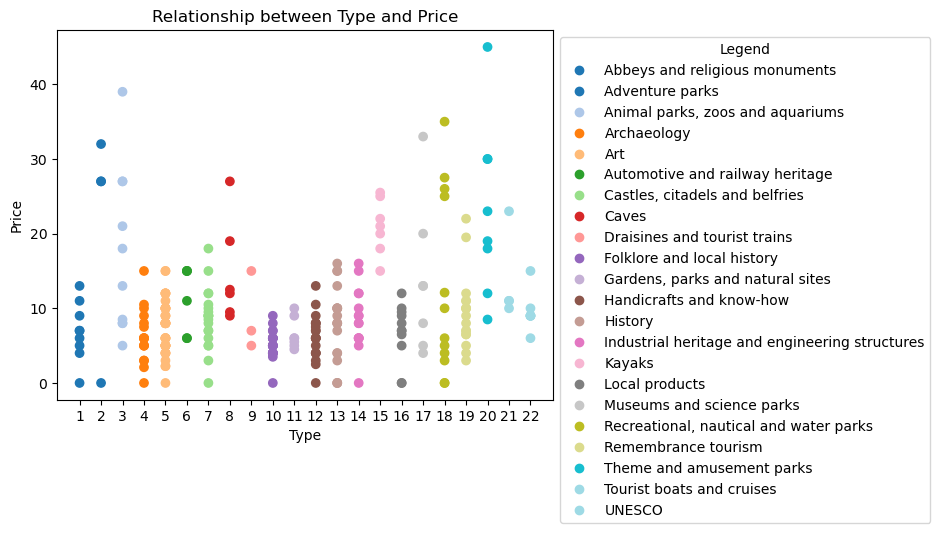

In [32]:
df = pd.read_excel('webscraping.xlsx')
activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}
df['Type'] = df['Type'].replace(activity_type_dict)
num_colors = len(activity_type_dict)
colors = plt.cm.get_cmap('tab20', num_colors)
legend_entries = []
for activity, color in zip(activity_type_dict.keys(), colors.colors):
    legend_entries.append(plt.Line2D([], [], marker='o', linestyle='', color=color, label=activity))
plt.scatter(df['Type'], df['Adults'], c=colors(df['Type'] - 1))

# Add axis labels and title
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Relationship between Type and Price')
plt.legend(handles=legend_entries)
xtick_labels = range(1, len(activity_type_dict) + 1)
plt.xticks(list(activity_type_dict.values()), xtick_labels)
legend = plt.legend(handles=legend_entries)
legend.set_bbox_to_anchor((1.0, 1.0))
legend.set_title('Legend')  # Set a title for the legend
plt.show()

You can see that there seem to be a relationship between the type of activity and the prices, which is a good news for our research question.

### Children

**See if there is a relation between the type of activity and the children price**

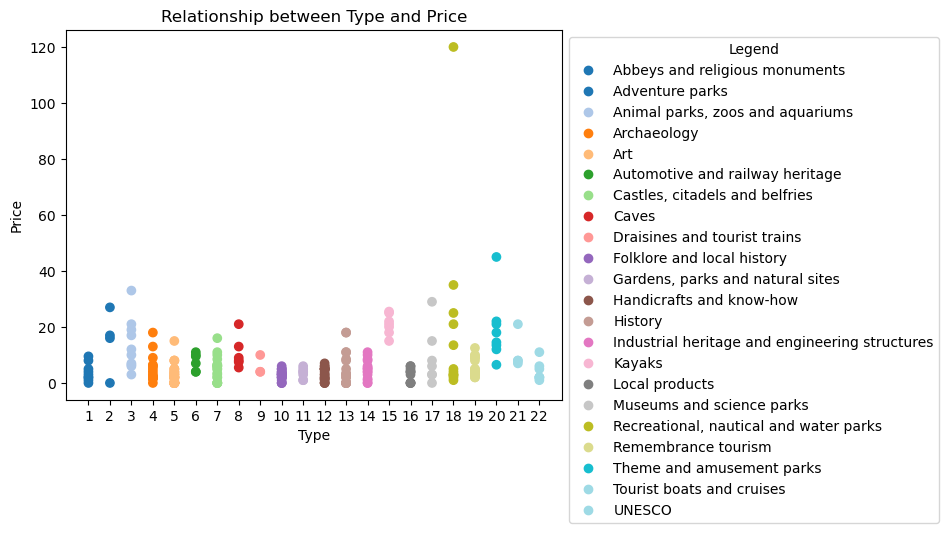

In [36]:
df = pd.read_excel('webscraping.xlsx')
activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}
df['Type'] = df['Type'].replace(activity_type_dict)
num_colors = len(activity_type_dict)
colors = plt.cm.get_cmap('tab20', num_colors)
legend_entries = []
for activity, color in zip(activity_type_dict.keys(), colors.colors):
    legend_entries.append(plt.Line2D([], [], marker='o', linestyle='', color=color, label=activity))
plt.scatter(df['Type'], df['Children'], c=colors(df['Type'] - 1))

# Add axis labels and title
plt.xlabel('Type')
plt.ylabel('Price')
plt.title('Relationship between Type and Price')
plt.legend(handles=legend_entries)
xtick_labels = range(1, len(activity_type_dict) + 1)
plt.xticks(list(activity_type_dict.values()), xtick_labels)
legend = plt.legend(handles=legend_entries)
legend.set_bbox_to_anchor((1.0, 1.0))
legend.set_title('Legend')  # Set a title for the legend
plt.show()

You can see that there is a relationship between children prices and the type of activity and that the prices are lower than these for adults. Again, it is a good news for our research question.

## Bar Chart

**See how many activities there are for the 20 cities with the most activities**

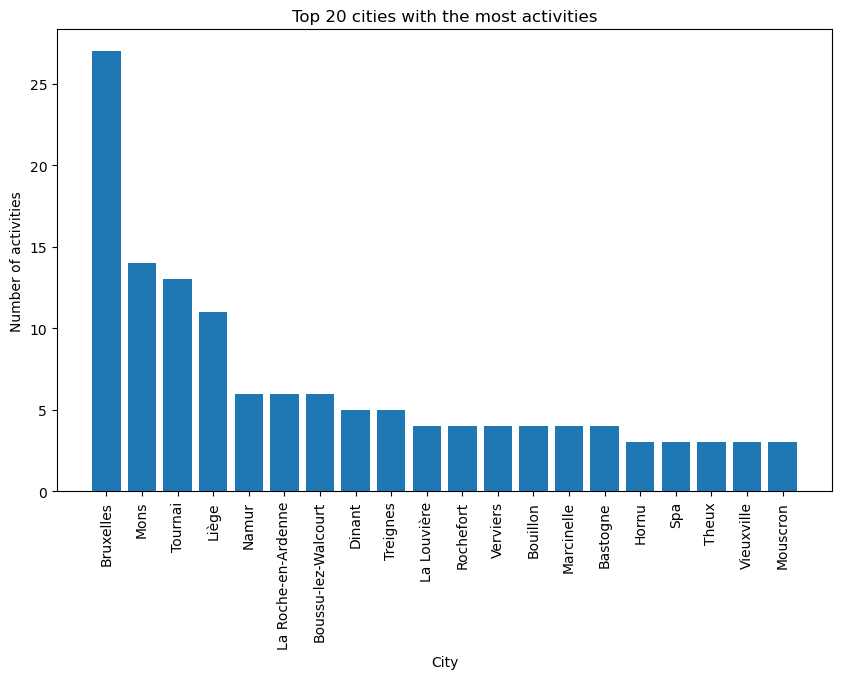

In [13]:
top_cities = df.groupby('City').size().sort_values(ascending=False).head(20)

# Create a bar chart of the top 10 cities and their activity count
plt.figure(figsize=(10, 6))
plt.bar(top_cities.index, top_cities.values)
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Number of activities')
plt.title('Top 20 cities with the most activities')
plt.show()

The is a bar chat to see where are the 20 cities with the most number of activities in Belgium. As you can see the place where there is the most activities is in Bruxelles and then it is Mons and Tournai. 

## Box plot

### Adults

**Show the distribution of adult prices for each activity type**

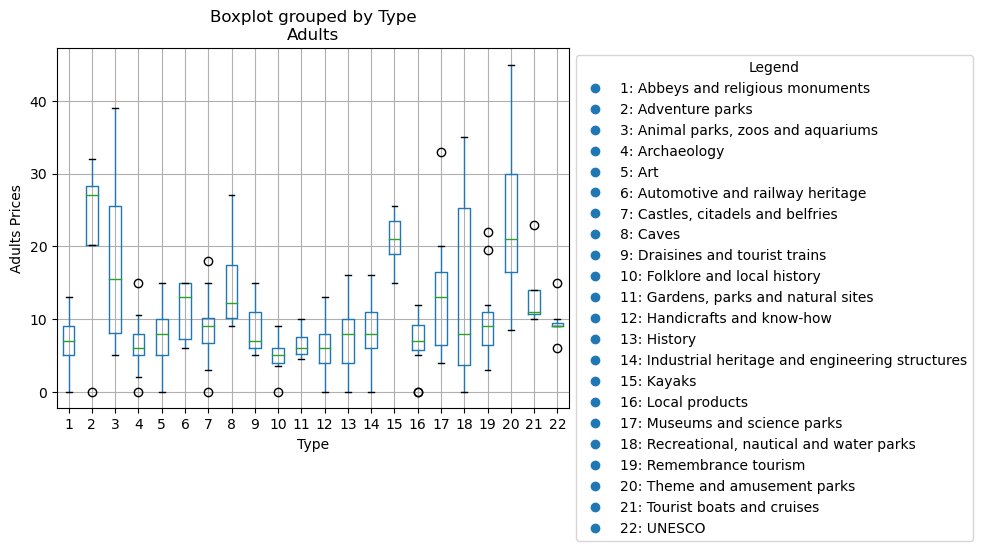

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.dropna()

# Create Series objects for array1 and array2
array1 = df['Adults']
array2 = df['Children']

# Calculate the result
result = array1 / array2

# Create a dictionary that maps the activity types to numeric values
activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}

# Replace the activity types with the corresponding numeric values
df['Type'] = df['Type'].replace(activity_type_dict)

# Create a box plot of prices by activity type
ax = df.boxplot(column='Adults', by='Type')

# Replace the activity type labels on the x-axis
labels = {'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22}
ax.set_xticklabels(labels.values())

# Set y-axis label
plt.ylabel('Adults Prices')

# Add legend
legend_entries = [plt.Line2D([], [], marker='o', linestyle='', label=f'{v}: {k}') for k, v in activity_type_dict.items()]
plt.legend(handles=legend_entries, title='Activity Type')
legend = plt.legend(handles=legend_entries)
legend.set_bbox_to_anchor((1.0, 1.0))
legend.set_title('Legend')

plt.show()

The box plot shows the median price (the line inside the box), the interquartile range (the box), the whiskers (the lines extending from the box that indicate the range of values outside the box), and any outliers (represented as individual points) for each type of activity. The price with the highest mean is the type "Theme and amusement parks" and the type with the smallest mean is the "Gardens, parks and natural sites". 

### Children

**Show the distribution of adult prices for each activity type**

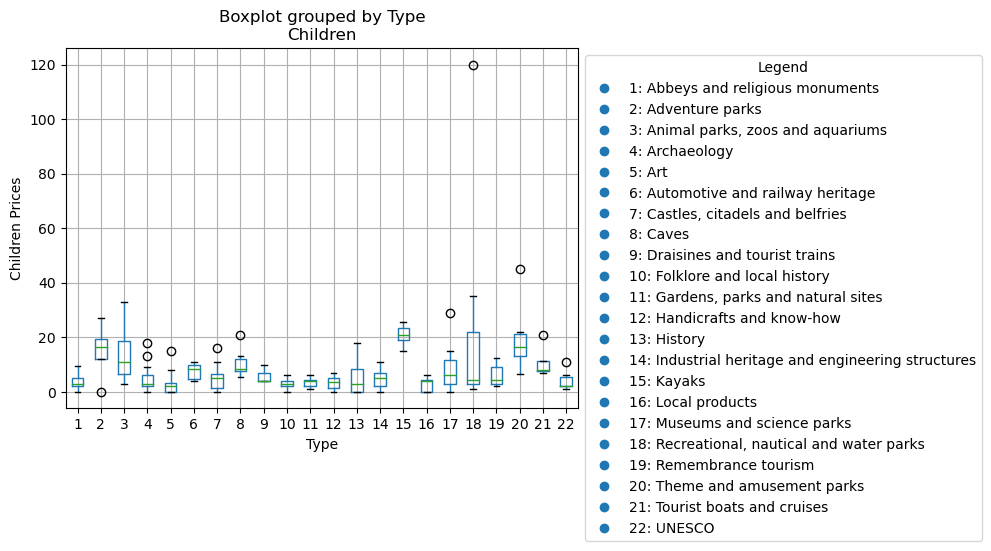

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = df.dropna()

# Create Series objects for array1 and array2
array1 = df['Adults']
array2 = df['Children']

# Calculate the result
result = array1 / array2

# Create a dictionary that maps the activity types to numeric values
activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}

# Replace the activity types with the corresponding numeric values
df['Type'] = df['Type'].replace(activity_type_dict)

# Create a box plot of prices by activity type
ax = df.boxplot(column='Children', by='Type')

# Replace the activity type labels on the x-axis
labels = {'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22}
ax.set_xticklabels(labels.values())

# Set y-axis labels
plt.ylabel('Children Prices')

# Add legend
legend_entries = [plt.Line2D([], [], marker='o', linestyle='', label=f'{v}: {k}') for k, v in activity_type_dict.items()]
plt.legend(handles=legend_entries, title='Activity Type')
legend = plt.legend(handles=legend_entries)
legend.set_bbox_to_anchor((1.0, 1.0))
legend.set_title('Legend')

plt.show()

First, as you can see compared to the adults prices we can see that the means here are lower than before, so we can say that globally the child prices are lower than the adult prices (as expected). Here the type of activities with the lowest mean are "Abbeys and religious monuments", "art", "garden, parks and naturel sites", and "UNESCO". The activity with the highest mean is the "Kayaks".

Generally speaking, these two graphs show that children's prices are lower than adults' overall, which was the expected result.

## Pie chart

**Show the percentage of each activity type in the database**

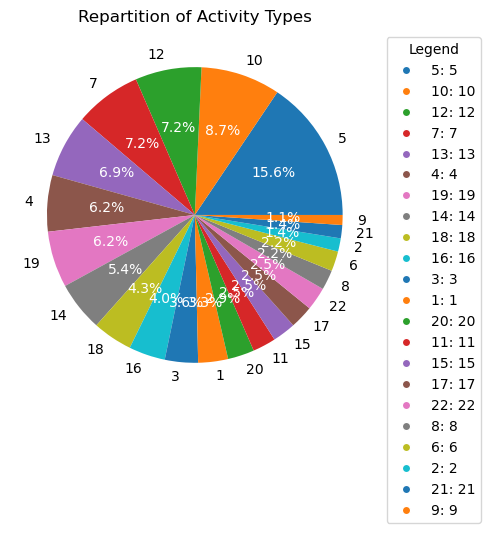

In [31]:
import matplotlib.pyplot as plt

# Create a dictionary that maps the activity types to numeric values
activity_type_dict = {
    'Abbeys and religious monuments': 1,
    'Adventure parks': 2,
    'Animal parks, zoos and aquariums': 3,
    'Archaeology': 4,
    'Art': 5,
    'Automotive and railway heritage': 6,
    'Castles, citadels and belfries': 7,
    'Caves': 8,
    'Draisines and tourist trains': 9,
    'Folklore and local history': 10,
    'Gardens, parks and natural sites': 11,
    'Handicrafts and know-how': 12,
    'History': 13,
    'Industrial heritage and engineering structures': 14,
    'Kayaks': 15,
    'Local products': 16,
    'Museums and science parks': 17,
    'Recreational, nautical and water parks': 18,
    'Remembrance tourism': 19,
    'Theme and amusement parks': 20,
    'Tourist boats and cruises': 21,
    'UNESCO': 22
}

# Get unique activity types and their counts
activity_counts = df['Type'].value_counts()

# Get activity types and counts
activity_types = activity_counts.index
activity_values = activity_counts.values

# Create a pie chart
fig, ax = plt.subplots()
wedges, _, autotexts = ax.pie(activity_values, labels=activity_types, autopct='%1.1f%%')

# Create custom legend labels with number and activity name
legend_labels = [f'{activity_type_dict.get(label, label)}: {label}' for label in activity_types]

# Create custom legend handles with colors from the pie chart
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=facecolor)
                  for label, facecolor in zip(legend_labels, [w.get_facecolor() for w in wedges])]

# Add legend
legend = plt.legend(handles=legend_handles, title='Activity Type')
legend.set_bbox_to_anchor((1.0, 1.0))
legend.set_title('Legend')

# Set the color of the autopct labels to white for better visibility
for autotext in autotexts:
    autotext.set_color('white')

# Set the title of the chart
ax.set_title('Repartition of Activity Types')

# Show the chart
plt.show()

Here we can see that the type of activity containing the most activities in Belgium is "art". And the type with the least activity is "Draisins and tourist trains". 